In [1]:
#-------------------------------
# Dependencies and Setup
#-------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import hvplot.pandas


#-------------------------------
# Dependencies and Setup
#-------------------------------

pop_df = pd.read_csv('resources/NYC_Bor_pop.csv')
arrest_df = pd.read_csv('resources/NYC_Bor_Arrest.csv')
MentFac_df = pd.read_csv('resources/Ment_Fac_Bor.csv')
merge_final_count_df = pd.read_csv('resources/merge_final_count.csv')


C:\Users\pit\AppData\Local\Temp\ipykernel_17756\3538388174.py:16: DtypeWarning: Columns (0,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arrest_df = pd.read_csv('resources/NYC_Bor_Arrest.csv')


In [2]:
arrest_df = arrest_df.loc[0:170094, :]
arrest_df.dtypes
arrest_df.head()

,ARREST_KEY,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,261209118,K,45-64,F,BLACK,999335,186085,40.677426,-73.945615
1,262984267,K,25-44,M,BLACK,1009318,178259,40.655923,-73.90965
2,263664549,K,25-44,M,WHITE,982272,158771,40.602468,-74.00712
3,261345231,M,25-44,M,BLACK,999899,238684,40.821797,-73.943457
4,263536618,K,25-44,M,BLACK,1001437,183080,40.669175,-73.938042


In [3]:
#-------------------------------
# Created a dataframe that sums up all arrest based on their borough
#-------------------------------

arrest_df.ARREST_BORO.unique()
arrest_df['ARREST_BORO'] = arrest_df['ARREST_BORO'].replace(['B', 'K', 'M', 'Q', 'S'], ['Bronx', 'Brooklyn', 'Manhatten', 'Queens', 'Staten Island'])
arrest_bor_df = arrest_df.groupby('ARREST_BORO')
arrest_bor_count = arrest_bor_df.size()
arrest_bor_count_df = arrest_bor_count.reset_index(name='Arrest Count')
arrest_bor_count_df = arrest_bor_count_df.rename(columns={'ARREST_BORO':'Borough'})
arrest_bor_count_df.head()

,Borough,Arrest Count
0,Bronx,39957
1,Brooklyn,46825
2,Manhatten,39652
3,Queens,36246
4,Staten Island,7415


In [3]:
MentFac_df.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [4]:
#-------------------------------
# Created a dataframe that sums up all mental health facilities based on their borough
#-------------------------------

MentFac_df.borough.unique()
MentFac_df['borough'] = MentFac_df['borough'].replace(['Manhattan'], ['Manhatten'])
Grouped_MentFac_df = MentFac_df.groupby('borough')
Grouped_MentFac_count = Grouped_MentFac_df.size()
MenFac_count_df = Grouped_MentFac_count.reset_index(name='Facility Count')
MenFac_count_df = MenFac_count_df.rename(columns={'borough':'Borough'})
MenFac_count_df.head()

,Borough,Facility Count
0,Bronx,9
1,Brooklyn,19
2,Manhatten,33
3,Queens,14
4,Staten Island,3


In [5]:
#-------------------------------
# Merged the mental facility dataframe with the borough populations dataframe
#-------------------------------

MentFac_pop_df = pd.merge(MenFac_count_df, pop_df, on='Borough', how='outer')
MentFac_pop_df = MentFac_pop_df.rename(columns={'Age':'Population'})
MentFac_pop_df.head()

,Borough,Facility Count,Population
0,Bronx,9,1472654
1,Brooklyn,19,2736074
2,Manhatten,33,1694251
3,Queens,14,2405464
4,Staten Island,3,495747


In [6]:
pop_df = pop_df.rename(columns={'Age':'Population'})
pop_df.head()

,Borough,Population
0,Bronx,1472654
1,Brooklyn,2736074
2,Manhatten,1694251
3,Queens,2405464
4,Staten Island,495747


In [7]:
#-------------------------------
# Merged the arrest count dataframe with the borough populations dataframe
#-------------------------------

arrest_pop_df = pd.merge(arrest_bor_count_df, pop_df, on='Borough', how='outer')
arrest_pop_df.head()

,Borough,Arrest Count,Population
0,Bronx,39957,1472654
1,Brooklyn,46825,2736074
2,Manhatten,39652,1694251
3,Queens,36246,2405464
4,Staten Island,7415,495747


In [20]:
#-------------------------------
# Merged the arrest and mental health facility dataframes together
#-------------------------------

merged_arrest_mentfac_df = pd.merge(arrest_pop_df, MentFac_pop_df, on='Borough', how='outer')
merged_arrest_mentfac_df = merged_arrest_mentfac_df[['Borough', 'Arrest Count', 'Population_x', 'Facility Count']]
merged_arrest_mentfac_df = merged_arrest_mentfac_df.rename(columns={'Population_x':'Population'})


#-------------------------------
# Created a new column for Crime Rate
#-------------------------------
merged_arrest_mentfac_df['Crime Rate per 100,000'] = (merged_arrest_mentfac_df['Arrest Count'] / merged_arrest_mentfac_df['Population']) * 100000


#-------------------------------
# Created a new column for Facility Rate
#-------------------------------
merged_arrest_mentfac_df['Facility Rate per 100,000'] = (merged_arrest_mentfac_df['Facility Count'] / merged_arrest_mentfac_df['Population']) * 100000


#-------------------------------
# Rounded up Crime Rate to a whole number
#-------------------------------
merged_arrest_mentfac_df['Crime per Facility'] = (merged_arrest_mentfac_df['Crime Rate per 100,000'] / merged_arrest_mentfac_df['Facility Count'])
merged_arrest_mentfac_df['Crime Rate per 100,000'] = merged_arrest_mentfac_df['Crime Rate per 100,000'].round()
merged_arrest_mentfac_df



,Borough,Arrest Count,Population,Facility Count,"Crime Rate per 100,000","Facility Rate per 100,000",Crime per Facility
0,Bronx,39957,1472654,9,2713.0,0.611142,301.473847
1,Brooklyn,46825,2736074,19,1711.0,0.694426,90.073356
2,Manhatten,39652,1694251,33,2340.385220,1.947763,70.920764
3,Queens,36246,2405464,14,1507.0,0.582008,107.629962
4,Staten Island,7415,495747,3,1496.0,0.605147,498.574206


In [29]:
#-------------------------------
# Got the sum of all the arrests
#-------------------------------

total_arrest = merged_arrest_mentfac_df['Arrest Count'].sum()
total_population

170095

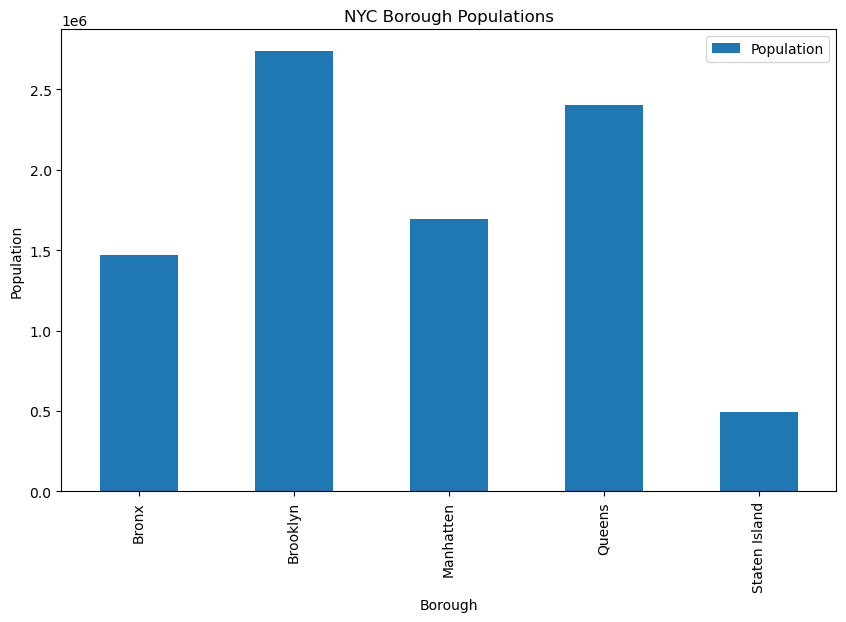

In [51]:
#-------------------------------
# Created a bar chart that shows total population for each Borough
#-------------------------------
merged_arrest_mentfac_df.plot(x='Borough', y='Population', kind='bar', figsize=(10,6))
plt.xlabel('Borough')
plt.ylabel('Population')
plt.title('NYC Borough Populations')
plt.savefig('Resources/NYC_pop_bar.png', bbox_inches='tight')
plt.show()


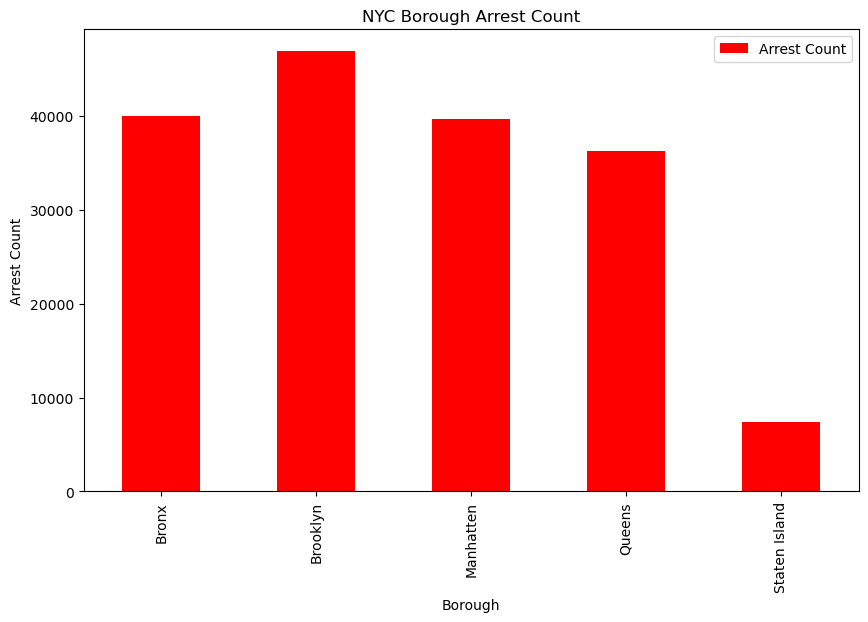

In [52]:
#-------------------------------
# Created a bar chart that shows total arrest count for each Borough
#-------------------------------
merged_arrest_mentfac_df.plot(x='Borough', y='Arrest Count', kind='bar', color='red', figsize=(10,6))
plt.xlabel('Borough')
plt.ylabel('Arrest Count')
plt.title('NYC Borough Arrest Count')
plt.savefig('Resources/NYC_arrest_bar.png', bbox_inches='tight')
plt.show()

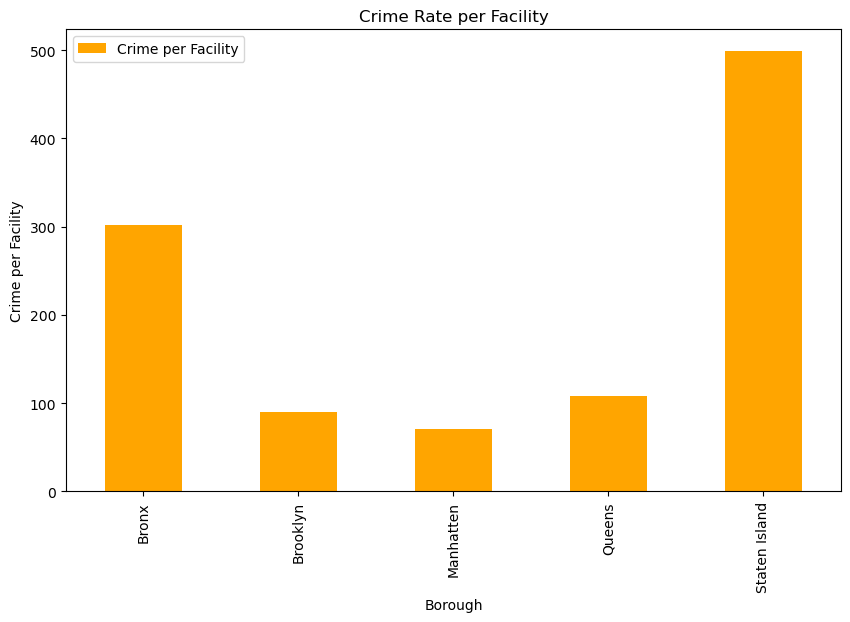

In [53]:
#-------------------------------
# Created a bar chart that shows the crime rate per facility within each Borough
#-------------------------------
merged_arrest_mentfac_df.plot(x='Borough', y='Crime per Facility', kind='bar', color='orange', figsize=(10,6))
plt.xlabel('Borough')
plt.ylabel('Crime per Facility')
plt.title('Crime Rate per Facility')
plt.savefig('Resources/NYC_crime_bar.png', bbox_inches='tight')
plt.show()

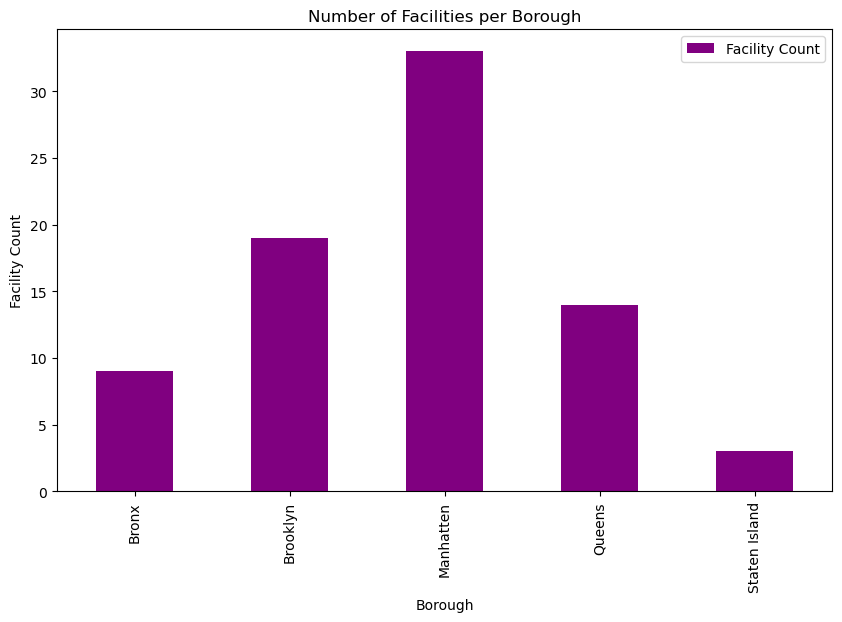

In [50]:
#-------------------------------
# Created a bar chart that shows total number of mental health facilities for each Borough
#-------------------------------
merged_arrest_mentfac_df.plot(x='Borough', y='Facility Count', kind='bar', color='purple', figsize=(10,6))
plt.xlabel('Borough')
plt.ylabel('Facility Count')
plt.title('Number of Facilities per Borough')
plt.savefig('Resources/NYC_facility_bar.png', bbox_inches='tight')
plt.show()

In [65]:
 merged_arrest_mentfac_df = merged_arrest_mentfac_df[merged_arrest_mentfac_df['Borough'] != 'ARREST_BORO']
 merged_arrest_mentfac_df

,Borough,Arrest Count,Population,Facility Count,"Crime Rate per 100,000","Facility Rate per 100,000",Crime per Facility,observed,total_arrest,even_arrest,total Facilities,fac percentage,expected
0,Bronx,39957,1472654,9,2713.0,0.611142,301.473847,39957,170095,34019.0,78,0.115385,19626.346154
1,Brooklyn,46825,2736074,19,1711.0,0.694426,90.073356,46825,170095,34019.0,78,0.243590,41433.397436
2,Manhatten,39652,1694251,33,2340.0,1.947763,70.920764,39652,170095,34019.0,78,0.423077,71963.269231
3,Queens,36246,2405464,14,1507.0,0.582008,107.629962,36246,170095,34019.0,78,0.179487,30529.871795
4,Staten Island,7415,495747,3,1496.0,0.605147,498.574206,7415,170095,34019.0,78,0.038462,6542.115385


In [66]:
arrest_df.head()


ARREST_KEY ARREST_BORO AGE_GROUP PERP_SEX PERP_RACE X_COORD_CD Y_COORD_CD  \
0  261209118    Brooklyn     45-64        F     BLACK     999335     186085   
1  262984267    Brooklyn     25-44        M     BLACK    1009318     178259   
2  263664549    Brooklyn     25-44        M     WHITE     982272     158771   
3  261345231   Manhatten     25-44        M     BLACK     999899     238684   
4  263536618    Brooklyn     25-44        M     BLACK    1001437     183080   

    Latitude  Longitude  
0  40.677426 -73.945615  
1  40.655923  -73.90965  
2  40.602468  -74.00712  
3  40.821797 -73.943457  
4  40.669175 -73.938042

In [12]:
arrest_df.dtypes

# df = df.astype(float)
# arrest_df.loc[:, ['Latitude', 'Longitude']] = arrest_df.loc[:, ['Latitude', 'Longitude']].astype(float)


# print(arrest_df["Latitude", "Longitude"]) 


arrest_df.dtypes


# for index, row in arrest_df.iterrows(): 
#     if isinstance(row["Latitude"], float):
#         pass
#     else:
#         print(row["Latitude"])
        
#         print(type(row["Latitude"]))

arrest_df['Latitude'] = pd.to_numeric(arrest_df['Latitude']) 

arrest_df['Longitude'] = pd.to_numeric(arrest_df['Longitude']) 

arrest_df = arrest_df[arrest_df.Latitude != 0]


arrest_df.dtypes










9.487729036781154

In [57]:
stats.chisquare(crime_chi_df['observed'], crime_chi_df['expected'])

Power_divergenceResult(statistic=37456.18135041619, pvalue=0.0)

In [60]:
#-------------------------------
# Created a chi-squared test to find out if we get similar results to the original test but this time using an evenly distributed amount of arrests for the expected values.
#-------------------------------

crime_chi_df = merged_arrest_mentfac_df.copy() 

# Observed data in a (hypothetical) survey of 6000 people 
crime_chi_df['observed'] = crime_chi_df['Arrest Count']

# Create a data frame
# crime_chi_df = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
crime_chi_df['total_arrest'] = 170095
crime_chi_df['even_arrest'] = 170095 / 5
crime_chi_df['total Facilities'] = crime_chi_df['Facility Count'].sum()
crime_chi_df['fac percentage'] = crime_chi_df['Facility Count'] / crime_chi_df['total Facilities']
crime_chi_df['expected'] = crime_chi_df['even_arrest']

# Rename the columns
# crime_chi_df.columns = ["observed", "expected"]

# View the data frame
crime_chi_df

,Borough,Arrest Count,Population,Facility Count,"Crime Rate per 100,000","Facility Rate per 100,000",Crime per Facility,observed,total_arrest,even_arrest,total Facilities,fac percentage,expected
0,Bronx,39957,1472654,9,2713.0,0.611142,301.473847,39957,170095,34019.0,78,0.115385,34019.0
1,Brooklyn,46825,2736074,19,1711.0,0.694426,90.073356,46825,170095,34019.0,78,0.243590,34019.0
2,Manhatten,39652,1694251,33,2340.0,1.947763,70.920764,39652,170095,34019.0,78,0.423077,34019.0
3,Queens,36246,2405464,14,1507.0,0.582008,107.629962,36246,170095,34019.0,78,0.179487,34019.0
4,Staten Island,7415,495747,3,1496.0,0.605147,498.574206,7415,170095,34019.0,78,0.038462,34019.0


In [61]:
import scipy.stats as stats
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [62]:
stats.chisquare(crime_chi_df['observed'], crime_chi_df['expected'])

Power_divergenceResult(statistic=27740.865810282492, pvalue=0.0)

chi test - how/when to experct values, total population, expected values would be the borough pop percentage multiplied by total arrests; screenshot of observed vs expected

bar graphs arrests & population, facility & population

geographic - 


In [14]:
# !pip install -c pyviz hvplot geoviews
# !conda install -c conda-forge geoviews
!pip install geoviews